In [31]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.linear_model import ElasticNet
from sklearn import metrics
import matplotlib.pyplot as plt
import pickle

# Dataset Nuclear Explosion(19)

In [2]:
a=pd.read_csv(r"E:\Python Data Science\Documents\19_nuclear_explosions.csv")
a

,WEAPON SOURCE COUNTRY,WEAPON DEPLOYMENT LOCATION,Data.Source,Location.Cordinates.Latitude,Location.Cordinates.Longitude,Data.Magnitude.Body,Data.Magnitude.Surface,Location.Cordinates.Depth,Data.Yeild.Lower,Data.Yeild.Upper,Data.Purpose,Data.Name,Data.Type,Date.Day,Date.Month,Date.Year
0,USA,Alamogordo,DOE,32.54,-105.57,0.0,0.0,-0.10,21.0,21.0,Wr,Trinity,Tower,16,7,1945
1,USA,Hiroshima,DOE,34.23,132.27,0.0,0.0,-0.60,15.0,15.0,Combat,Littleboy,Airdrop,5,8,1945
2,USA,Nagasaki,DOE,32.45,129.52,0.0,0.0,-0.60,21.0,21.0,Combat,Fatman,Airdrop,9,8,1945
3,USA,Bikini,DOE,11.35,165.20,0.0,0.0,-0.20,21.0,21.0,We,Able,Airdrop,30,6,1946
4,USA,Bikini,DOE,11.35,165.20,0.0,0.0,0.03,21.0,21.0,We,Baker,Uw,24,7,1946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2041,CHINA,Lop Nor,HFS,41.69,88.35,5.3,0.0,0.00,3.0,12.0,Wr,Nan,Ug,29,7,1996
2042,INDIA,Pokhran,HFS,27.07,71.70,5.3,0.0,0.00,0.0,20.0,Wr,Shakti 1-3,Ug,11,5,1998
2043,INDIA,Pokhran,NRD,27.07,71.70,0.0,0.0,0.00,0.0,1.0,Wr,Nan,Ug,13,5,1998
2044,PAKIST,Chagai,HFS,28.90,64.89,0.0,0.0,0.00,0.0,35.0,Wr,Nan,Ug,28,5,1998


In [3]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2046 entries, 0 to 2045
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   WEAPON SOURCE COUNTRY          2046 non-null   object 
 1   WEAPON DEPLOYMENT LOCATION     2046 non-null   object 
 2   Data.Source                    2046 non-null   object 
 3   Location.Cordinates.Latitude   2046 non-null   float64
 4   Location.Cordinates.Longitude  2046 non-null   float64
 5   Data.Magnitude.Body            2046 non-null   float64
 6   Data.Magnitude.Surface         2046 non-null   float64
 7   Location.Cordinates.Depth      2046 non-null   float64
 8   Data.Yeild.Lower               2046 non-null   float64
 9   Data.Yeild.Upper               2046 non-null   float64
 10  Data.Purpose                   2046 non-null   object 
 11  Data.Name                      2046 non-null   object 
 12  Data.Type                      2046 non-null   o

In [5]:
a.columns

Index(['WEAPON SOURCE COUNTRY', 'WEAPON DEPLOYMENT LOCATION', 'Data.Source',
       'Location.Cordinates.Latitude', 'Location.Cordinates.Longitude',
       'Data.Magnitude.Body', 'Data.Magnitude.Surface',
       'Location.Cordinates.Depth', 'Data.Yeild.Lower', 'Data.Yeild.Upper',
       'Data.Purpose', 'Data.Name', 'Data.Type', 'Date.Day', 'Date.Month',
       'Date.Year'],
      dtype='object')

In [34]:
x=a[['Location.Cordinates.Latitude', 'Location.Cordinates.Longitude','Date.Day', 'Date.Month','Date.Year']]
y=a['Date.Day']

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [36]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [37]:
print(lr.intercept_)

2.3092638912203256e-13


In [38]:
coeff=pd.DataFrame(lr.coef_,x.columns,columns=['Co-efficient'])
coeff

,Co-efficient
Location.Cordinates.Latitude,0.000000e+00
Location.Cordinates.Longitude,-1.321138e-17
Date.Day,1.000000e+00
Date.Month,4.723528e-16
Date.Year,-1.210268e-16


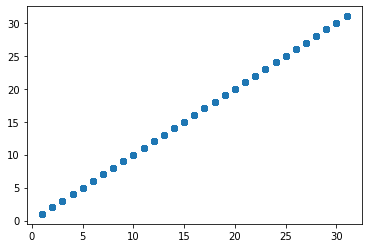

In [39]:
#Predicting

prediction=lr.predict(x_test)
plt.scatter(y_test,prediction)

In [40]:
# Score
print(lr.score(x_test,y_test))

1.0


In [41]:
#Ridge fitting
rr=Ridge(alpha=10)
rr.fit(x_train,y_train)

Ridge(alpha=10)

In [42]:
#Ridge Score
rr.score(x_test,y_test)

0.9999999915080077

In [43]:
# Lasso Fitting
la=Lasso(alpha=10)
la.fit(x_train,y_train)

Lasso(alpha=10)

In [44]:
# Lasso Score
la.score(x_test,y_test)

0.9828446312771798

In [45]:
# ElasticNet
en=ElasticNet()
en.fit(x_train,y_train)

ElasticNet()

In [46]:
print(en.coef_)

[ 0.00000000e+00  5.41964309e-06  9.87013039e-01 -0.00000000e+00
  0.00000000e+00]


In [47]:
print(en.intercept_)

0.2145600881098808


In [48]:
print(en.predict(x_test))

[23.90315648 12.05808788 30.81133562 10.08406169 21.92799607 10.08517126
 29.82432259  2.188883   11.07212724  8.1115432  20.94108041 26.86315882
 29.82419739  4.16304029  3.17497156  9.09705418 30.81112426 16.99315308
 25.87732292 16.00719226  9.09707044 24.89078139 29.82524718 29.82432231
 27.85029597 23.9021197   1.20199586 28.8384222  22.91615536 18.96811293
  1.20094445 23.90224435 10.08511755 24.88925739 22.9161662  12.05914525
 25.87626848 12.05913929  7.12413237  6.13600921 18.96717915 20.94211573
 19.95419219 16.00719208 19.95406738 27.85029651 23.90318466 24.88988607
 11.07107284 23.90348306  1.2008198   7.12407491 20.94120523 28.83730955
 11.07212696  8.11096248 21.92799607 10.0849452  29.82419902 17.98016449
 14.03362143 23.90224337 27.85123952 19.95406754  4.16198357 14.03211152
 16.9931514   1.20160039 12.05808517 20.94120523 20.94225781 10.0840618
  6.13717823 24.88925739 24.88925502  5.14899558  5.1488728  25.87627
 28.83730906 17.98016612 19.95419219 25.87719068  9.097

In [49]:
print(en.score(x_test,y_test))

0.9998306262233414


In [50]:
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,prediction))

Mean Absolute Error: 2.322246629521317e-15


In [51]:
print("Mean Squared Error:",metrics.mean_squared_error(y_test,prediction))

Mean Squared Error: 9.311614072227204e-30


In [52]:
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,prediction)))

Root Mean Squared Error: 3.051493744418822e-15


In [53]:
# Model Saving

filename="Prediction"
pickle.dump(lr,open(filename,'wb'))

In [54]:
filename='Prediction'
model=pickle.load(open(filename,'rb'))

In [55]:
real=[[10,30,15,45,48],[11,43,23,56,89]]
result=model.predict(real)

In [56]:
result

array([15., 23.])

# DataSet States(20)

In [57]:
b=pd.read_csv(r"E:\Python Data Science\Documents\20_states.csv")
b

,id,name,country_id,country_code,country_name,state_code,type,latitude,longitude
0,3901,Badakhshan,1,AF,Afghanistan,BDS,NaN,36.734772,70.811995
1,3871,Badghis,1,AF,Afghanistan,BDG,NaN,35.167134,63.769538
2,3875,Baghlan,1,AF,Afghanistan,BGL,NaN,36.178903,68.745306
3,3884,Balkh,1,AF,Afghanistan,BAL,NaN,36.755060,66.897537
4,3872,Bamyan,1,AF,Afghanistan,BAM,NaN,34.810007,67.821210
...,...,...,...,...,...,...,...,...,...
5072,1953,Mashonaland West Province,247,ZW,Zimbabwe,MW,NaN,-17.485103,29.788925
5073,1960,Masvingo Province,247,ZW,Zimbabwe,MV,NaN,-20.624151,31.262637
5074,1954,Matabeleland North Province,247,ZW,Zimbabwe,MN,NaN,-18.533157,27.549585
5075,1952,Matabeleland South Province,247,ZW,Zimbabwe,MS,NaN,-21.052337,29.045993


In [58]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5077 entries, 0 to 5076
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            5077 non-null   int64  
 1   name          5077 non-null   object 
 2   country_id    5077 non-null   int64  
 3   country_code  5063 non-null   object 
 4   country_name  5077 non-null   object 
 5   state_code    5072 non-null   object 
 6   type          1597 non-null   object 
 7   latitude      5008 non-null   float64
 8   longitude     5008 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 357.1+ KB


In [63]:
c=b.fillna(value=12)
c

,id,name,country_id,country_code,country_name,state_code,type,latitude,longitude
0,3901,Badakhshan,1,AF,Afghanistan,BDS,12,36.734772,70.811995
1,3871,Badghis,1,AF,Afghanistan,BDG,12,35.167134,63.769538
2,3875,Baghlan,1,AF,Afghanistan,BGL,12,36.178903,68.745306
3,3884,Balkh,1,AF,Afghanistan,BAL,12,36.755060,66.897537
4,3872,Bamyan,1,AF,Afghanistan,BAM,12,34.810007,67.821210
...,...,...,...,...,...,...,...,...,...
5072,1953,Mashonaland West Province,247,ZW,Zimbabwe,MW,12,-17.485103,29.788925
5073,1960,Masvingo Province,247,ZW,Zimbabwe,MV,12,-20.624151,31.262637
5074,1954,Matabeleland North Province,247,ZW,Zimbabwe,MN,12,-18.533157,27.549585
5075,1952,Matabeleland South Province,247,ZW,Zimbabwe,MS,12,-21.052337,29.045993


In [64]:
c.columns

Index(['id', 'name', 'country_id', 'country_code', 'country_name',
       'state_code', 'type', 'latitude', 'longitude'],
      dtype='object')

In [68]:
x=c[['id','country_id',  'latitude', 'longitude']]
y=c[ 'longitude']

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [70]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [71]:
print(lr.intercept_)

-7.105427357601002e-15


In [72]:
coeff=pd.DataFrame(lr.coef_,x.columns,columns=['Co-efficient'])
coeff

,Co-efficient
id,6.360891e-19
country_id,1.175807e-16
latitude,-2.141985e-16
longitude,1.000000e+00


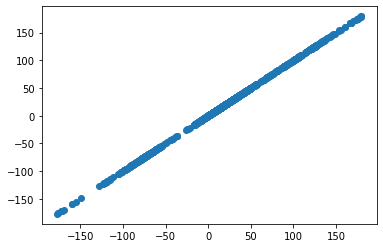

In [73]:

#Predicting

prediction=lr.predict(x_test)
plt.scatter(y_test,prediction)

In [74]:
# Score
print(lr.score(x_test,y_test))

1.0


In [75]:
#Ridge fitting
rr=Ridge(alpha=10)
rr.fit(x_train,y_train)

Ridge(alpha=10)

In [76]:
#Ridge Score
rr.score(x_test,y_test)

0.9999999999994046

In [77]:
# Lasso Fitting
la=Lasso(alpha=10)
la.fit(x_train,y_train)

Lasso(alpha=10)

In [78]:
# Lasso Score
la.score(x_test,y_test)

0.999992499563783

In [79]:

# ElasticNet
en=ElasticNet()
en.fit(x_train,y_train)

ElasticNet()

In [80]:
print(en.coef_)


[-7.15600596e-07  0.00000000e+00 -0.00000000e+00  9.99724499e-01]


In [81]:
print(en.intercept_)

0.006583324447458239


In [82]:
print(en.predict(x_test))

[ 38.99183778 -93.379616    -3.42298782 ...  -1.12325946  72.93069266
  35.51657767]


In [83]:
print(en.score(x_test,y_test))

0.9999999249754027


In [84]:
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,prediction))

Mean Absolute Error: 1.2870898071819649e-14


In [85]:
print("Mean Squared Error:",metrics.mean_squared_error(y_test,prediction))

Mean Squared Error: 2.882393513010361e-28


In [86]:
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,prediction)))

Root Mean Squared Error: 1.697761323923466e-14


In [87]:
# Model Saving
filename="Prediction"
pickle.dump(lr,open(filename,'wb'))

In [88]:
filename='Prediction'
model=pickle.load(open(filename,'rb'))

In [89]:
real=[[10,30,15,45],[11,43,23,56]]
result=model.predict(real)

In [90]:
result

array([45., 56.])

# DataSet Cities(21)

In [91]:
d=pd.read_csv(r"E:\Python Data Science\Documents\21_cities.csv")
d

,id,name,state_id,state_code,state_name,country_id,country_code,country_name,latitude,longitude,wikiDataId
0,52,Ashkāsham,3901,BDS,Badakhshan,1,AF,Afghanistan,36.68333,71.53333,Q4805192
1,68,Fayzabad,3901,BDS,Badakhshan,1,AF,Afghanistan,37.11664,70.58002,Q156558
2,78,Jurm,3901,BDS,Badakhshan,1,AF,Afghanistan,36.86477,70.83421,Q10308323
3,84,Khandūd,3901,BDS,Badakhshan,1,AF,Afghanistan,36.95127,72.31800,Q3290334
4,115,Rāghistān,3901,BDS,Badakhshan,1,AF,Afghanistan,37.66079,70.67346,Q2670909
...,...,...,...,...,...,...,...,...,...,...,...
150449,131496,Redcliff,1957,MI,Midlands Province,247,ZW,Zimbabwe,-19.03333,29.78333,Q584001
150450,131502,Shangani,1957,MI,Midlands Province,247,ZW,Zimbabwe,-19.78333,29.36667,Q32017959
150451,131503,Shurugwi,1957,MI,Midlands Province,247,ZW,Zimbabwe,-19.67016,30.00589,Q32019023
150452,131504,Shurugwi District,1957,MI,Midlands Province,247,ZW,Zimbabwe,-19.75000,30.16667,Q7505444


In [92]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150454 entries, 0 to 150453
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            150454 non-null  int64  
 1   name          150454 non-null  object 
 2   state_id      150454 non-null  int64  
 3   state_code    150129 non-null  object 
 4   state_name    150454 non-null  object 
 5   country_id    150454 non-null  int64  
 6   country_code  150406 non-null  object 
 7   country_name  150454 non-null  object 
 8   latitude      150454 non-null  float64
 9   longitude     150454 non-null  float64
 10  wikiDataId    147198 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 12.6+ MB


In [93]:
d.columns

Index(['id', 'name', 'state_id', 'state_code', 'state_name', 'country_id',
       'country_code', 'country_name', 'latitude', 'longitude', 'wikiDataId'],
      dtype='object')

In [94]:
x=d[['id','state_id','country_id', 'latitude', 'longitude']]
y=d['country_id']

In [95]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [96]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [97]:
print(lr.intercept_)

-1.3073986337985843e-12


In [98]:
coeff=pd.DataFrame(lr.coef_,x.columns,columns=['Co-efficient'])
coeff

,Co-efficient
id,1.379258e-17
state_id,5.450213e-17
country_id,1.000000e+00
latitude,1.036312e-16
longitude,7.744319e-16


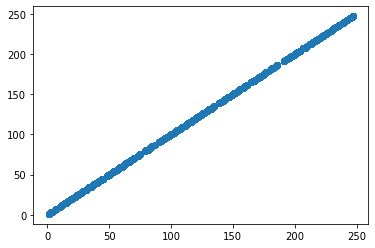

In [99]:
#Predicting

prediction=lr.predict(x_test)
plt.scatter(y_test,prediction)

In [100]:
# Score
print(lr.score(x_test,y_test))

1.0


In [101]:
#Ridge fitting
rr=Ridge(alpha=10)
rr.fit(x_train,y_train)

Ridge(alpha=10)

In [102]:
#Ridge Score
rr.score(x_test,y_test)

0.9999999999999993

In [103]:
# Lasso Fitting
la=Lasso(alpha=10)
la.fit(x_train,y_train)

Lasso(alpha=10)

In [104]:
# Lasso Score
la.score(x_test,y_test)

0.9999931052297957

In [105]:
# ElasticNet
en=ElasticNet()
en.fit(x_train,y_train)

ElasticNet()

In [106]:
print(en.coef_)

[ 3.41330011e-07 -2.26027893e-06  9.99656382e-01  0.00000000e+00
 -0.00000000e+00]


In [107]:
print(en.intercept_)

0.028374039761871472


In [108]:
print(en.predict(x_test))

[142.01715078 204.00093848  31.01829503 ...  48.01255914 206.95833375
 108.00426777]


In [109]:
print(en.score(x_test,y_test))

0.9999999305933207


In [110]:
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,prediction))

Mean Absolute Error: 5.643150415378383e-13


In [111]:
print("Mean Squared Error:",metrics.mean_squared_error(y_test,prediction))

Mean Squared Error: 4.233440061229533e-25


In [112]:
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,prediction)))

Root Mean Squared Error: 6.506489115667169e-13


In [113]:
# Model Saving
filename="Prediction"
pickle.dump(lr,open(filename,'wb'))

In [114]:
filename='Prediction'
model=pickle.load(open(filename,'rb'))

In [115]:
real=[[10,30,15,45,48],[11,43,23,56,89]]
result=model.predict(real)
result

array([15., 23.])

# DataSet Countries(22)

In [116]:
e=pd.read_csv(R"E:\Python Data Science\Documents\22_countries.csv")
e

,id,name,iso3,iso2,numeric_code,phone_code,capital,currency,currency_name,currency_symbol,tld,native,region,subregion,timezones,latitude,longitude,emoji,emojiU
0,1,Afghanistan,AFG,AF,4,93,Kabul,AFN,Afghan afghani,؋,.af,افغانستان,Asia,Southern Asia,"[{zoneName:'Asia\/Kabul',gmtOffset:16200,gmtOf...",33.000000,65.0,🇦🇫,U+1F1E6 U+1F1EB
1,2,Aland Islands,ALA,AX,248,+358-18,Mariehamn,EUR,Euro,€,.ax,Åland,Europe,Northern Europe,"[{zoneName:'Europe\/Mariehamn',gmtOffset:7200,...",60.116667,19.9,🇦🇽,U+1F1E6 U+1F1FD
2,3,Albania,ALB,AL,8,355,Tirana,ALL,Albanian lek,Lek,.al,Shqipëria,Europe,Southern Europe,"[{zoneName:'Europe\/Tirane',gmtOffset:3600,gmt...",41.000000,20.0,🇦🇱,U+1F1E6 U+1F1F1
3,4,Algeria,DZA,DZ,12,213,Algiers,DZD,Algerian dinar,دج,.dz,الجزائر,Africa,Northern Africa,"[{zoneName:'Africa\/Algiers',gmtOffset:3600,gm...",28.000000,3.0,🇩🇿,U+1F1E9 U+1F1FF
4,5,American Samoa,ASM,AS,16,+1-684,Pago Pago,USD,US Dollar,$,.as,American Samoa,Oceania,Polynesia,"[{zoneName:'Pacific\/Pago_Pago',gmtOffset:-396...",-14.333333,-170.0,🇦🇸,U+1F1E6 U+1F1F8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,243,Wallis And Futuna Islands,WLF,WF,876,681,Mata Utu,XPF,CFP franc,₣,.wf,Wallis et Futuna,Oceania,Polynesia,"[{zoneName:'Pacific\/Wallis',gmtOffset:43200,g...",-13.300000,-176.2,🇼🇫,U+1F1FC U+1F1EB
246,244,Western Sahara,ESH,EH,732,212,El-Aaiun,MAD,Moroccan Dirham,MAD,.eh,الصحراء الغربية,Africa,Northern Africa,"[{zoneName:'Africa\/El_Aaiun',gmtOffset:3600,g...",24.500000,-13.0,🇪🇭,U+1F1EA U+1F1ED
247,245,Yemen,YEM,YE,887,967,Sanaa,YER,Yemeni rial,﷼,.ye,اليَمَن,Asia,Western Asia,"[{zoneName:'Asia\/Aden',gmtOffset:10800,gmtOff...",15.000000,48.0,🇾🇪,U+1F1FE U+1F1EA
248,246,Zambia,ZMB,ZM,894,260,Lusaka,ZMW,Zambian kwacha,ZK,.zm,Zambia,Africa,Eastern Africa,"[{zoneName:'Africa\/Lusaka',gmtOffset:7200,gmt...",-15.000000,30.0,🇿🇲,U+1F1FF U+1F1F2


In [117]:
e.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               250 non-null    int64  
 1   name             250 non-null    object 
 2   iso3             250 non-null    object 
 3   iso2             249 non-null    object 
 4   numeric_code     250 non-null    int64  
 5   phone_code       250 non-null    object 
 6   capital          245 non-null    object 
 7   currency         250 non-null    object 
 8   currency_name    250 non-null    object 
 9   currency_symbol  250 non-null    object 
 10  tld              250 non-null    object 
 11  native           249 non-null    object 
 12  region           248 non-null    object 
 13  subregion        247 non-null    object 
 14  timezones        250 non-null    object 
 15  latitude         250 non-null    float64
 16  longitude        250 non-null    float64
 17  emoji           

In [119]:
f=e.fillna(value=65)
f

,id,name,iso3,iso2,numeric_code,phone_code,capital,currency,currency_name,currency_symbol,tld,native,region,subregion,timezones,latitude,longitude,emoji,emojiU
0,1,Afghanistan,AFG,AF,4,93,Kabul,AFN,Afghan afghani,؋,.af,افغانستان,Asia,Southern Asia,"[{zoneName:'Asia\/Kabul',gmtOffset:16200,gmtOf...",33.000000,65.0,🇦🇫,U+1F1E6 U+1F1EB
1,2,Aland Islands,ALA,AX,248,+358-18,Mariehamn,EUR,Euro,€,.ax,Åland,Europe,Northern Europe,"[{zoneName:'Europe\/Mariehamn',gmtOffset:7200,...",60.116667,19.9,🇦🇽,U+1F1E6 U+1F1FD
2,3,Albania,ALB,AL,8,355,Tirana,ALL,Albanian lek,Lek,.al,Shqipëria,Europe,Southern Europe,"[{zoneName:'Europe\/Tirane',gmtOffset:3600,gmt...",41.000000,20.0,🇦🇱,U+1F1E6 U+1F1F1
3,4,Algeria,DZA,DZ,12,213,Algiers,DZD,Algerian dinar,دج,.dz,الجزائر,Africa,Northern Africa,"[{zoneName:'Africa\/Algiers',gmtOffset:3600,gm...",28.000000,3.0,🇩🇿,U+1F1E9 U+1F1FF
4,5,American Samoa,ASM,AS,16,+1-684,Pago Pago,USD,US Dollar,$,.as,American Samoa,Oceania,Polynesia,"[{zoneName:'Pacific\/Pago_Pago',gmtOffset:-396...",-14.333333,-170.0,🇦🇸,U+1F1E6 U+1F1F8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,243,Wallis And Futuna Islands,WLF,WF,876,681,Mata Utu,XPF,CFP franc,₣,.wf,Wallis et Futuna,Oceania,Polynesia,"[{zoneName:'Pacific\/Wallis',gmtOffset:43200,g...",-13.300000,-176.2,🇼🇫,U+1F1FC U+1F1EB
246,244,Western Sahara,ESH,EH,732,212,El-Aaiun,MAD,Moroccan Dirham,MAD,.eh,الصحراء الغربية,Africa,Northern Africa,"[{zoneName:'Africa\/El_Aaiun',gmtOffset:3600,g...",24.500000,-13.0,🇪🇭,U+1F1EA U+1F1ED
247,245,Yemen,YEM,YE,887,967,Sanaa,YER,Yemeni rial,﷼,.ye,اليَمَن,Asia,Western Asia,"[{zoneName:'Asia\/Aden',gmtOffset:10800,gmtOff...",15.000000,48.0,🇾🇪,U+1F1FE U+1F1EA
248,246,Zambia,ZMB,ZM,894,260,Lusaka,ZMW,Zambian kwacha,ZK,.zm,Zambia,Africa,Eastern Africa,"[{zoneName:'Africa\/Lusaka',gmtOffset:7200,gmt...",-15.000000,30.0,🇿🇲,U+1F1FF U+1F1F2


In [120]:
f.columns

Index(['id', 'name', 'iso3', 'iso2', 'numeric_code', 'phone_code', 'capital',
       'currency', 'currency_name', 'currency_symbol', 'tld', 'native',
       'region', 'subregion', 'timezones', 'latitude', 'longitude', 'emoji',
       'emojiU'],
      dtype='object')

In [124]:
x=f[['id', 'numeric_code','latitude', 'longitude']]
y=f['numeric_code']

In [125]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [126]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [127]:
print(lr.intercept_)

-3.410605131648481e-13


In [128]:
coeff=pd.DataFrame(lr.coef_,x.columns,columns=['Co-efficient'])
coeff

,Co-efficient
id,1.249049e-15
numeric_code,1.000000e+00
latitude,-2.218408e-16
longitude,-4.924645e-17


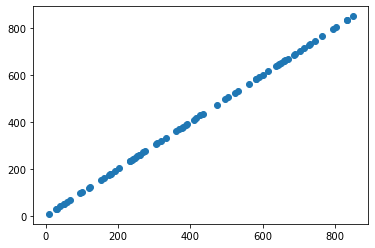

In [130]:
#Predicting

prediction=lr.predict(x_test)
plt.scatter(y_test,prediction)

In [131]:
# Score
print(lr.score(x_test,y_test))

1.0


In [132]:
#Ridge fitting
rr=Ridge(alpha=10)
rr.fit(x_train,y_train)

Ridge(alpha=10)

In [133]:
#Ridge Score
rr.score(x_test,y_test)

0.9999999999986439

In [134]:
# Lasso Fitting
la=Lasso(alpha=10)
la.fit(x_train,y_train)


Lasso(alpha=10)

In [135]:
# Lasso Score
la.score(x_test,y_test)

0.9999999767213269

In [136]:
# ElasticNet
en=ElasticNet()
en.fit(x_train,y_train)

ElasticNet()

In [137]:
print(en.coef_)

[ 0.          0.99998488  0.         -0.        ]


In [138]:
print(en.intercept_)

0.006739499929665271


In [139]:
print(en.predict(x_test))


[203.00367114  60.0058326  641.99703564 689.99631011 239.003127
 580.99795765 100.00522799 582.99792742 849.9938917   68.00571168
 473.99957496 270.00265844 258.00283982 124.00486523 803.994587
 254.00290028 180.00401879 434.00017957 645.99697518 561.99824484
 703.9960985  248.00299097 659.99676356 637.9970961  495.99924243
 523.99881921 178.00404902 380.00099578 120.00492569 731.99567528
 532.99868318 417.00043652 304.00214452 651.99688449 428.00027026
  28.00631628 833.99413355 503.99912151  31.00627093 743.9954939
 260.00280959 615.99742863 728.99572063 392.0008144  795.99470792
 232.00323281 376.00105624 320.00190268 832.99414866  96.00528845
 368.00117716 590.9978065   50.00598375 234.00320258 661.99673333
 763.9951916  715.99591712 192.00383741 276.00256775 242.00308166
 658.99677868 410.00054233 332.0017213  174.00410948 308.00208406
 685.99637057  51.00596863 669.99661241 599.99767047   8.00661858
  40.0061349  152.00444201 388.00087486 162.00429086 360.00129808]


In [140]:
print(en.score(x_test,y_test))

0.9999999997672168


In [141]:
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,prediction))

Mean Absolute Error: 1.7497114868092467e-13


In [142]:
print("Mean Squared Error:",metrics.mean_squared_error(y_test,prediction))

Mean Squared Error: 4.0832881440159776e-26


In [143]:
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,prediction)))

Root Mean Squared Error: 2.020714760676523e-13


In [144]:
# Model Saving
filename="Prediction"
pickle.dump(lr,open(filename,'wb'))

In [145]:
filename='Prediction'
model=pickle.load(open(filename,'rb'))

In [146]:
real=[[10,30,15,48],[43,23,56,89]]
result=model.predict(real)
result

array([30., 23.])

# DataSet Vande Bharat(23)

In [148]:
g=pd.read_csv(r"E:\Python Data Science\Documents\23_Vande Bharat.csv")
g

,Sr. No.,Train Name,Train Number,Originating City,Originating Station,Terminal City,Terminal Station,Operator,No. of Cars,Frequency,Distance,Travel Time,Speed,Average Speed,Inauguration,Average occupancy
0,1,New Delhi - Varanasi Vande Bharat Express,22435/22436,Delhi,New Delhi,Varanasi,Varanasi Junction,NR,16,Except Thursdays,759 km (472 mi),08h 00m,130 km/h (81 mph),95 km/h (59 mph),2/15/2019,126%
1,2,New Delhi - Shri Mata Vaishno Devi Katra Vande...,22439/22440,Delhi,New Delhi,Katra,Shri Mata Vaishno Devi Katra,NR,16,Except Tuesdays,655 km (407 mi),08h 00m,130 km/h (81 mph),82 km/h (51 mph),10/3/2019,114%
2,3,Mumbai Central - Gandhinagar Capital Vande Bha...,20901/20902,Mumbai,Mumbai Central,Gandhinagar,Gandhinagar Capital,WR,16,Except Wednesdays,522 km (324 mi),06h 25m,130 km/h (81 mph),82 km/h (51 mph),9/30/2022,132%
3,4,New Delhi - Amb Andaura Vande Bharat Express,22447/22448,Delhi,New Delhi,Andaura,Amb Andaura,NR,16,Except Fridays,412 km (256 mi),05h 10m,130 km/h (81 mph),79 km/h (49 mph),10/13/2022,70%
4,5,MGR Chennai Central - Mysuru Vande Bharat Express,20607/20608,Chennai,Chennai Central,Mysuru,Mysore Junction,SR,16,Except Wednesdays,496 km (308 mi),06h 30m,130 km/h (81 mph),79 km/h (49 mph),11/11/2022,75%
5,6,Bilaspur - Nagpur Vande Bharat Express,20825/20826,"Bilaspur, Chhattisgarh",Bilaspur Junction,Nagpur,Nagpur Junction,SECR,8,Except Saturdays,412 km (256 mi),05h 30m,130 km/h (81 mph),75 km/h (47 mph),12/11/2022,96%
6,7,Howrah - New Jalpaiguri Vande Bharat Express,22301/22302,Kolkata,Howrah Junction,Siliguri,New Jalpaiguri Junction,ER,16,Except Wednesdays,565 km (351 mi),07h 30m,130 km/h (81 mph),75 km/h (47 mph),12/30/2022,100%
7,8,Visakhapatnam - Secunderabad Vande Bharat Express,20833/20834,Visakhapatnam,Visakhapatnam Junction,Hyderabad,Secunderabad Junction,ECoR,16,Except Sundays,698 km (434 mi),08h 30m,130 km/h (81 mph),82 km/h (51 mph),1/15/2023,120%
8,9,Mumbai CSMT - Solapur Vande Bharat Express,22225/22226,Mumbai,Chhatrapati Shivaji Terminus,Solapur,Solapur,CR,16,"Except Wednesdays (22225) , Except Thursdays (...",452 km (281 mi),06h 30m,110 km/h (68 mph),70 km/h (43 mph),2/10/2023,100%
9,10,Mumbai CSMT - Sainagar Shirdi Vande Bharat Exp...,22223/22224,Mumbai,Chhatrapati Shivaji Terminus,Shirdi,Sainagar Shirdi,CR,16,Except Tuesdays,339 km (211 mi),05h 20m,110 km/h (68 mph),64 km/h (40 mph),2/10/2023,93%


In [149]:
g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Sr. No.              26 non-null     int64 
 1   Train Name           26 non-null     object
 2   Train Number         26 non-null     object
 3   Originating City     26 non-null     object
 4   Originating Station  26 non-null     object
 5   Terminal City        26 non-null     object
 6   Terminal Station     26 non-null     object
 7   Operator             26 non-null     object
 8   No. of Cars          26 non-null     int64 
 9   Frequency            26 non-null     object
 10  Distance             26 non-null     object
 11  Travel Time          26 non-null     object
 12  Speed                26 non-null     object
 13  Average Speed        26 non-null     object
 14  Inauguration         26 non-null     object
 15  Average occupancy    26 non-null     object
dtypes: int64(2

In [150]:
g.columns

Index(['Sr. No.', 'Train Name', 'Train Number', 'Originating City',
       'Originating Station', 'Terminal City', 'Terminal Station', 'Operator',
       'No. of Cars', 'Frequency', 'Distance', 'Travel Time', 'Speed',
       'Average Speed', 'Inauguration', 'Average occupancy'],
      dtype='object')

In [152]:
x=g[['Sr. No.', 'No. of Cars',]]
y=g[ 'No. of Cars']

In [153]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [154]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [155]:
print(lr.intercept_)

0.0


In [156]:
coeff=pd.DataFrame(lr.coef_,x.columns,columns=['Co-efficient'])
coeff

,Co-efficient
Sr. No.,0.0
No. of Cars,1.0


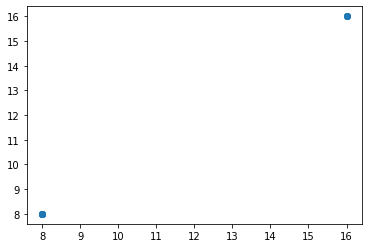

In [157]:
#Predicting

prediction=lr.predict(x_test)
plt.scatter(y_test,prediction)

In [158]:
# Score
print(lr.score(x_test,y_test))

1.0


In [159]:
#Ridge fitting
rr=Ridge(alpha=10)
rr.fit(x_train,y_train)

Ridge(alpha=10)

In [160]:
#Ridge Score
rr.score(x_test,y_test)

0.9974418797763854

In [161]:
# Lasso Fitting
la=Lasso(alpha=10)
la.fit(x_train,y_train)

Lasso(alpha=10)

In [162]:
# Lasso Score
la.score(x_test,y_test)

0.08284993682125907

In [163]:
# ElasticNet
en=ElasticNet()
en.fit(x_train,y_train)

ElasticNet()

In [164]:
print(en.coef_)

[-0.01441278  0.91105544]


In [165]:
print(en.intercept_)

1.4096217538444478


In [166]:
print(en.predict(x_test))

[ 8.38098401 15.97209599 15.95768321  8.36657122  8.39539679 15.77031701
  8.45304793  8.51069907]


In [167]:
print(en.score(x_test,y_test))

0.9920229043368902


In [168]:
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,prediction))

Mean Absolute Error: 0.0


In [169]:
print("Mean Squared Error:",metrics.mean_squared_error(y_test,prediction))

Mean Squared Error: 0.0


In [170]:
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,prediction)))


Root Mean Squared Error: 0.0


In [171]:
# Model Saving
filename="Prediction"
pickle.dump(lr,open(filename,'wb'))

In [172]:
filename='Prediction'
model=pickle.load(open(filename,'rb'))

In [174]:
real=[[10,30],[11,89]]
result=model.predict(real)
result

array([30., 89.])